<a href="https://colab.research.google.com/github/hasib231/Data_Mining_and_Machine_Learning/blob/main/D%26M_lab_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#D&M lab task 1
##Name: Hasibul hasan
##ID: 191-15-12894
##Sec: H

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
file_path='/content/drive/MyDrive/Colab files/D&M Lab/Churn Modelling .csv'

In [63]:
df = pd.read_csv(file_path)

In [64]:
size = df.size

##1. Total dataset number:

In [65]:
print("There are total ",size,"data in the dataset")

There are total  140000 data in the dataset


In [66]:
shape = df.shape

In [67]:
print("There are ",shape[0]," rows and ",shape[1]," colums")

There are  10000  rows and  14  colums


##2. All columns name:

In [68]:
colums_name = df.columns
print("All colums name:")
print()
colums_name

All colums name:



Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

##3. Total NULL value:

In [69]:
null_values = df.isnull().sum()
print("Total null values in the dataset are", null_values.sum())
print()
null_values

Total null values in the dataset are 21



RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                11
Tenure              0
Balance            10
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

##4. Process the null values

In [70]:
data = df.dropna() #drop the null values row wise
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3970,3971,15634310,Ko,509,France,Male,30.0,6,0.00,2,1,0,180598.86,0
5319,5320,15719779,May,645,Germany,Male,25.0,1,157404.02,2,1,0,93073.04,0
896,897,15733119,Mistry,718,France,Male,35.0,8,0.00,2,1,0,94820.85,0
4963,4964,15652084,Boni,515,France,Male,40.0,0,109542.29,1,1,1,166370.81,0
485,486,15637954,Lewis,730,France,Female,35.0,0,155470.55,1,1,1,53718.28,0


##5.	Delete the unnecessary columns 

In [72]:
column_process = df.drop(['CustomerId','Tenure','NumOfProducts','HasCrCard','IsActiveMember'],axis=1)
column_process.head(5)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Balance,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42.0,NaN,101348.88,1
1,2,Hill,608,Spain,Female,41.0,83807.86,112542.58,0
2,3,Onio,502,France,Female,42.0,159660.80,113931.57,1
3,4,Boni,699,France,Female,39.0,NaN,93826.63,0
4,5,Mitchell,850,Spain,Female,43.0,125510.82,79084.10,0


##6.	Apply feature scaling 

In [73]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler(feature_range=(0,1))

In [74]:
CreditScore = MinMax.fit_transform(df[['CreditScore']])
Balance = MinMax.fit_transform(df[['Balance']])
EstimatedSalary = MinMax.fit_transform(df[['EstimatedSalary']])

In [75]:
#create new dataframe
df1 = pd.DataFrame(CreditScore,columns = ['CreditScore'])
df2 = pd.DataFrame(Balance,columns = ['Balance'])
df3 = pd.DataFrame(EstimatedSalary,columns = ['EstimatedSalary'])
new_df=df1.join(df2)
new_df=new_df.join(df3)
new_df.head(10)

,CreditScore,Balance,EstimatedSalary
0,0.538,NaN,0.506735
1,0.516,0.334031,0.562709
2,0.304,0.636357,0.569654
3,0.698,NaN,0.469120
4,1.000,0.500246,0.395400
5,0.590,0.453394,0.748797
6,0.944,NaN,0.050261
7,0.052,0.458540,0.596733
8,0.302,0.566170,0.374680
9,0.668,0.536488,0.358605


##7.	Represent Geography column data using pie charts 

In [76]:
geography = df['Geography'].value_counts()

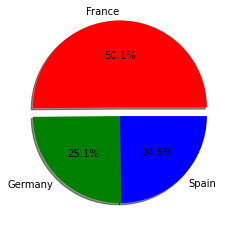

In [77]:
country_name = geography.index
val = geography.values

explode = [0.1,0.0,0.0]
cols=['r','g','b']

plt.pie(val,labels=country_name,colors=cols,autopct="%1.1f%%",explode=explode, shadow=True)
plt.show()

##8.	Represent scatter plots

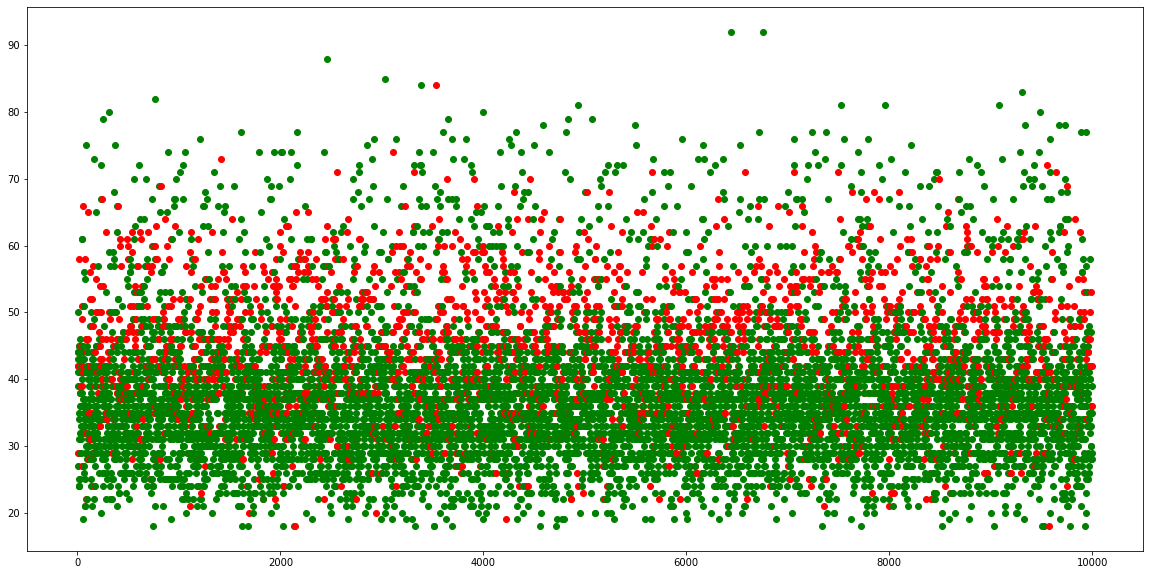

In [78]:
colors = { 1 : 'r', 0 : 'g'}
fig,ax=plt.subplots()

for i in range(len(df)):
  ax.scatter(df['RowNumber'][i],df['Age'][i],color=colors[df['Exited'][i]])
fig.set_size_inches(20,10)

#9.	Apply feature encoding

##Label Encoding 

In [79]:
#Apply Label encoding in Surname column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_surname=encoder.fit_transform(df['Surname'])
column_process['new_surname']=new_surname
column_process.head(10)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Balance,EstimatedSalary,Exited,new_surname
0,1,Hargrave,619,France,Female,42.0,NaN,101348.88,1,1115
1,2,Hill,608,Spain,Female,41.0,83807.86,112542.58,0,1177
2,3,Onio,502,France,Female,42.0,159660.80,113931.57,1,2040
3,4,Boni,699,France,Female,39.0,NaN,93826.63,0,289
4,5,Mitchell,850,Spain,Female,43.0,125510.82,79084.10,0,1822
5,6,Chu,645,Spain,Male,44.0,113755.78,149756.71,1,537
6,7,Bartlett,822,France,Male,50.0,NaN,10062.80,0,177
7,8,Obinna,376,Germany,Female,29.0,115046.74,119346.88,1,2000
8,9,He,501,France,Male,44.0,142051.07,74940.50,0,1146
9,10,H?,684,France,Male,27.0,134603.88,71725.73,0,1081


##One Hot Encoding

In [90]:
#Apply One Hot Encoding in Gender column
dummies = pd.get_dummies(column_process['Gender'])
dummies.head(10)

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,0,1


In [83]:
new_df2=column_process.join(dummies)
new_df2.head(10)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Balance,EstimatedSalary,Exited,new_surname,Female,Male
0,1,Hargrave,619,France,Female,42.0,NaN,101348.88,1,1115,1,0
1,2,Hill,608,Spain,Female,41.0,83807.86,112542.58,0,1177,1,0
2,3,Onio,502,France,Female,42.0,159660.80,113931.57,1,2040,1,0
3,4,Boni,699,France,Female,39.0,NaN,93826.63,0,289,1,0
4,5,Mitchell,850,Spain,Female,43.0,125510.82,79084.10,0,1822,1,0
5,6,Chu,645,Spain,Male,44.0,113755.78,149756.71,1,537,0,1
6,7,Bartlett,822,France,Male,50.0,NaN,10062.80,0,177,0,1
7,8,Obinna,376,Germany,Female,29.0,115046.74,119346.88,1,2000,1,0
8,9,He,501,France,Male,44.0,142051.07,74940.50,0,1146,0,1
9,10,H?,684,France,Male,27.0,134603.88,71725.73,0,1081,0,1


In [84]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
one_hot_encoder = OneHotEncoder(sparse=False,drop='first')

In [86]:
new_value = pd.DataFrame(one_hot_encoder.fit_transform(column_process[['Gender']]))

In [88]:
new_value.head(10)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,0.0
8,1.0
9,1.0


In [89]:
new_df3=column_process.join(new_value)
new_df3.head(10)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Balance,EstimatedSalary,Exited,new_surname,0
0,1,Hargrave,619,France,Female,42.0,NaN,101348.88,1,1115,0.0
1,2,Hill,608,Spain,Female,41.0,83807.86,112542.58,0,1177,0.0
2,3,Onio,502,France,Female,42.0,159660.80,113931.57,1,2040,0.0
3,4,Boni,699,France,Female,39.0,NaN,93826.63,0,289,0.0
4,5,Mitchell,850,Spain,Female,43.0,125510.82,79084.10,0,1822,0.0
5,6,Chu,645,Spain,Male,44.0,113755.78,149756.71,1,537,1.0
6,7,Bartlett,822,France,Male,50.0,NaN,10062.80,0,177,1.0
7,8,Obinna,376,Germany,Female,29.0,115046.74,119346.88,1,2000,0.0
8,9,He,501,France,Male,44.0,142051.07,74940.50,0,1146,1.0
9,10,H?,684,France,Male,27.0,134603.88,71725.73,0,1081,1.0
